### Answers to Assignment 5 of 230E

##### Authors(alphabetic order)
1) Ishan Pathak ishan_pathak@berkeley.edu
2) Leonid Maksymenko leo.maksymenko@berkeley.edu
3) Nymph Qiu nymph_qiu@berkeley.edu
4) Xuanzhong Ren rxz19@berkeley.edu

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

### Q1

$$P_t=E_t[\sum_{i=1}^{\infty}\frac{D_{t+i}}{(1+R)^i}]$$
Let $A=\sum_{i=1}^{\infty}\frac{D_{t+i}}{(1+R)^i}=\frac{\Delta D_{t+1}+D_t}{(1+R)}+\frac{\Delta D_{t+2}+\Delta D_{t+1}+D_t}{(1+R)^2} + ...$

$A=\sum_{i=1}^{\infty}\frac{D_t}{(1+R)^i}+\sum_{i=1}^{\infty}\frac{\Delta D_{t+1}}{(1+R)^i}+\frac{1}{1+R}\sum_{i=1}^{\infty}\frac{\Delta D_{t+2}}{(1+R)^i}+...=\frac{D_t}{R}+\frac{1}{R}\sum_{i=0}^{\infty}\frac{\Delta D_{t+i+1}}{(1+R)^i}$<br>
$P_t=E_t(A)=\frac{D_t}{R}+\frac{1}{R}E_t[\sum_{i=0}^{\infty}\frac{\Delta D_{t+i+1}}{(1+R)^i}]$ => $P_t-\frac{D_t}{R}=\frac{1}{R}E_t[\sum_{i=0}^{\infty}\frac{\Delta D_{t+i+1}}{(1+R)^i}]$<br>

Because $\Delta D_t$ is $I(0)$ process, prices and dividends would cointegrate.

### Q2

(a)

$1+R_{t+1} = \frac{P_{t+1}+D_{t+1}}{P_{t+1}}\frac{P_{t+1}}{P_t}$

$r_{t+1}=\log P_{t+1} - \log P_t + \log(1+\frac{D_{t+1}}{P_{t+1}})=p_{t+1}-p_t + \log(1+\frac{D_{t+1}}{P_{t+1}})$

$\log(1+\frac{D_{t+1}}{P_{t+1}})=\log(1+e^{d_{t+1}-p_{t+1}})\approx \frac{e^{\overline{d-p}}}{1+e^{\overline{d-p}}}(d_{t+1}-p_{t+1}-\overline{d-p})+\log(1+e^{\overline{d-p}})$

$\frac{e^{\overline{d-p}}}{1+e^{\overline{d-p}}}(d_{t+1}-p_{t+1}-\overline{d-p})+\log(1+e^{\overline{d-p}})=(1-\rho)(d_{t+1}-p_{t+1}-\ln(\frac{1}{\rho}-1))-\rho$

$r_{t+1}\approx p_{t+1}-p_t+(1-\rho)(d_{t+1}-p_{t+1}-\ln(\frac{1}{\rho}-1))-\rho$<br>
$=-\ln(\rho)-(1-\rho)\ln(\frac{1}{\rho}-1)+\rho p_{t+1}+(1-\rho)d_{t+1}-p_t=k+\rho p_{t+1}+(1-\rho)d_{t+1}-p_t$

(b)

$p_t\approx k+\rho p_{t+1}+(1-\rho)d_{t+1}-r_{t+1}=k+\rho (k+\rho p_{t+2}+(1-\rho)d_{t+2}-r_{t+2})+(1-\rho)d_{t+1}-r_{t+1}$

By induction<br>
$E_t(p_t)=p_t \approx E_t(\sum_{i=1}^{K}k\rho^{i-1}+\rho^K p_{t+K} + \sum_{i=1}^{K}\rho^{i-1}((1-\rho)d_{t+i}-r_{t+i}))$

When K tends infinite,<br>
$p_t\approx E_t[\sum_{j=0}^{\infty}\rho^{j}((1-\rho)d_{t+j+1}-r_{t+j+1})]$<br>
$p_t-d_t\approx E_t[\sum_{j=0}^{\infty}\rho^{j}((1-\rho)d_{t+j+1})]-d_t-E_t[\sum_{j=0}^{\infty}\rho^{j}r_{t+j+1}]$<br>
Let $X_t = \sum_{j=0}^{\infty}\rho^{j}((1-\rho)d_{t+j+1})-d_t=+\sum_{j=0}^{\infty}\rho^{j}((1-\rho)\Delta d_{t+j+1})+\rho\sum_{j=0}^{\infty}\rho^{j}((1-\rho)\Delta d_{t+j+2})+...$<br>
$X_t=\Delta d_{t+j+1}+\rho \Delta d_{t+j+2} + ...=\sum_{j=0}^{\infty}\rho^j \Delta d_{t+j+1}$<br>

$p_t-d_t\approx E_t[\sum_{j=0}^{\infty}\rho^j \Delta d_{t+j+1}] - E_t[\sum_{j=0}^{\infty}\rho^{j}r_{t+j+1}]=E_t[\sum_{j=0}^{\infty}\rho^{j}(\Delta d_{t+j+1} - r_{t+j+1})]$

### Q3

(a)

$\beta_p=\frac{1}{3}\sum_{j=1}^3 \beta_j=0.7$

(b)

$\sigma_p^2=\frac{1}{9}\sum_{j=1}^3(\beta_j^2 \sigma_{market}^2+\sigma_{\epsilon,j}^2)=
0.008533333333333332$

In [85]:
1/9*(0.02*(0.7**2+0.8**2+0.6**2)+0.01+0.025+0.012)

0.008533333333333332

(c)

$\frac{\beta_1^2\sigma_{market}^2}{\beta_1^2\sigma_{market}^2+\sigma_{\epsilon,1}^2}=0.494949494949495$

In [86]:
0.7**2*0.02/(0.7**2*0.02+0.01)

0.494949494949495

### Q4

(a)

In [194]:
import pandas as pd
import pandas_datareader.data as web
from datetime import datetime
ff_5_factor = web.DataReader('F-F_Research_Data_5_Factors_2x3', 'famafrench', start='1963-7-1')
mm_factor = web.DataReader('F-F_Momentum_Factor', 'famafrench', start='1963-7-1')
portfolio = web.DataReader('25_Portfolios_ME_Prior_12_2', 'famafrench', start='1963-7-1')

/var/folders/z1/63t9r5_d2vq7tf0245y_z8qr0000gn/T/ipykernel_61564/1486839674.py:4: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  ff_5_factor = web.DataReader('F-F_Research_Data_5_Factors_2x3', 'famafrench', start='1963-7-1')
/var/folders/z1/63t9r5_d2vq7tf0245y_z8qr0000gn/T/ipykernel_61564/1486839674.py:4: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  ff_5_factor = web.DataReader('F-F_Research_Data_5_Factors_2x3', 'famafrench', start='1963-7-1')
/var/folders/z1/63t9r5_d2vq7tf0245y_z8qr0000gn/T/ipykernel_61564/1486839674.py:5: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'obje

In [195]:
train_data = portfolio[1]
market_prem = ff_5_factor[0]["Mkt-RF"]
risk_free = ff_5_factor[0]["RF"]

In [209]:
import statsmodels.api as sm
data = {"portfolio": [],"alpha": [],"alpha_white_error":[],"alpha_nw_error": [],"p_val_alpha_white":[], "p_val_alpha_nw": [],"beta":[],"beta_white_error":[],"beta_nw_error": []}
for col in list(train_data.columns):
    Y = train_data[col]-risk_free
    X = market_prem
    X = sm.add_constant(X)
    model = sm.OLS(Y,X)
    results = model.fit(cov_type='HC3')
    data["portfolio"].append(col)
    data["alpha"].append(results.params["const"])
    data["beta"].append(results.params["Mkt-RF"])
    data["alpha_white_error"].append(results.bse["const"])
    data["beta_white_error"].append(results.bse["Mkt-RF"])
    data["p_val_alpha_white"].append(results.pvalues["const"])
    nw_results = sm.OLS(Y,X).fit(cov_type='HAC',cov_kwds={'maxlags':1})
    data["alpha_nw_error"].append(nw_results.bse["const"])
    data["beta_nw_error"].append(nw_results.bse["Mkt-RF"])
    data["p_val_alpha_nw"].append(nw_results.pvalues["const"])    
stats = pd.DataFrame(data=data)
stats

,portfolio,alpha,alpha_white_error,alpha_nw_error,p_val_alpha_white,p_val_alpha_nw,beta,beta_white_error,beta_nw_error
0,SMALL LoPRIOR,-0.221397,0.222042,0.229052,3.187183e-01,0.333754,1.316269,0.062579,0.066611
1,ME1 PRIOR2,0.301751,0.137711,0.145561,2.843839e-02,0.038170,0.992744,0.045024,0.046909
2,ME1 PRIOR3,0.495185,0.128034,0.137517,1.099045e-04,0.000317,0.914649,0.041273,0.041795
3,ME1 PRIOR4,0.644692,0.129414,0.139841,6.305696e-07,0.000004,0.927655,0.038936,0.039855
4,SMALL HiPRIOR,0.761188,0.163852,0.177971,3.391066e-06,0.000019,1.135040,0.043860,0.045390
5,ME2 PRIOR1,-0.640227,0.158517,0.160153,5.371340e-05,0.000064,1.473364,0.051260,0.055701
6,ME2 PRIOR2,0.044870,0.114334,0.113518,6.947301e-01,0.692646,1.137861,0.036396,0.036758
7,ME2 PRIOR3,0.253670,0.100867,0.101657,1.190725e-02,0.012583,1.038996,0.032709,0.033275
8,ME2 PRIOR4,0.396729,0.104653,0.105441,1.501024e-04,0.000168,1.064061,0.033870,0.034539
9,ME2 PRIOR5,0.500067,0.136657,0.139440,2.529235e-04,0.000335,1.282039,0.034326,0.036239


We could observe that $\alpha$ is not close to 0 for which the $\beta$ is biased. 

(b)

In [238]:
stats["t_alpha_white"] = stats["alpha"] / stats["alpha_white_error"]
stats["alpha significant?"] = stats["p_val_alpha_white"].apply(lambda x: x < 0.05)
stats[["portfolio", "p_val_alpha_white", "t_alpha_white", "alpha significant?"]]

,portfolio,p_val_alpha_white,t_alpha_white,alpha significant?
0,SMALL LoPRIOR,3.187183e-01,-0.997095,False
1,ME1 PRIOR2,2.843839e-02,2.191185,True
2,ME1 PRIOR3,1.099045e-04,3.867616,True
3,ME1 PRIOR4,6.305696e-07,4.981611,True
4,SMALL HiPRIOR,3.391066e-06,4.645590,True
5,ME2 PRIOR1,5.371340e-05,-4.038852,True
6,ME2 PRIOR2,6.947301e-01,0.392444,False
7,ME2 PRIOR3,1.190725e-02,2.514881,True
8,ME2 PRIOR4,1.501024e-04,3.790900,True
9,ME2 PRIOR5,2.529235e-04,3.659281,True


<Axes: >

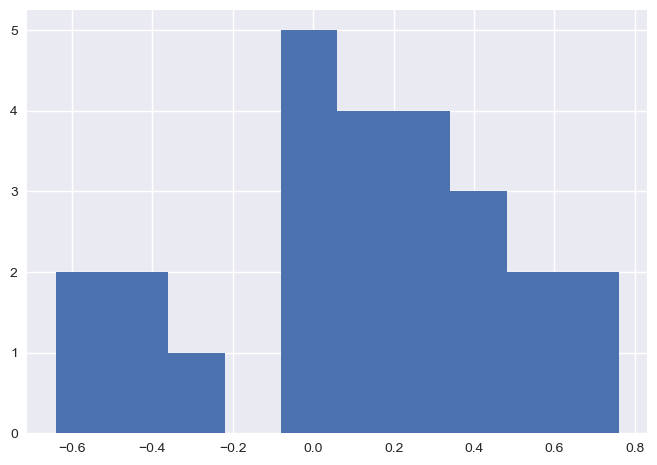

In [239]:
stats["alpha"].hist()

We could see that in most cases, $\alpha$ is significant which makes $\beta$ estimation biased. 16 out of 25 portfolios have significant $\alpha$, whose pricing errors matter when regression. And many pricing errors fall on the positive side. It might be due to idiosyncratice factors which cannot be captured by CAPM only.

(c)

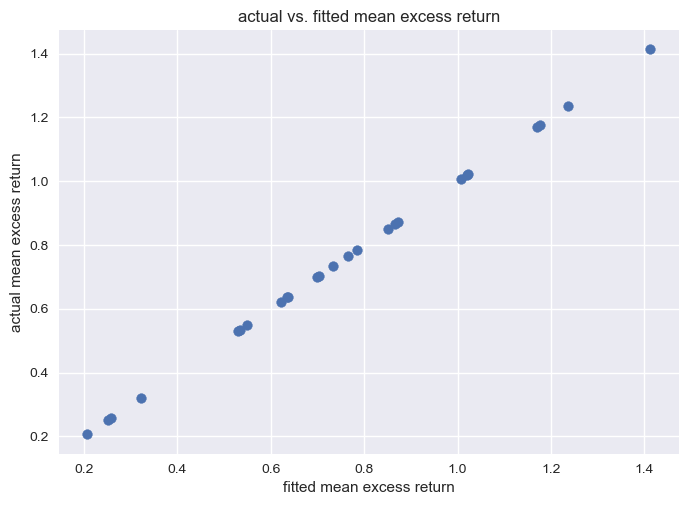

In [218]:
import numpy as np
mean_fitted = []
mean_actual = []
for col in list(train_data.columns):
    Y = train_data[col]-risk_free
    X = market_prem
    mean_fitted.append(stats.loc[stats["portfolio"]==col, "alpha"] + stats.loc[stats["portfolio"]==col, "beta"] * np.mean(X))
    mean_actual.append(np.mean(Y))
plt.scatter(mean_fitted, mean_actual)
plt.xlabel("fitted mean excess return")
plt.ylabel("actual mean excess return")
plt.title("actual vs. fitted mean excess return")
plt.show()

We could see that actual and fitted mean excess return are the same for each portfolio. This is consistent with the fact that $\bar{r_i^e}=\hat{\alpha}+\hat{\beta}\bar{r_m^e}$.

(d)

In [237]:
stats["t_alpha_white"] = stats["alpha"] / stats["alpha_white_error"]
stats["alpha significant? 95%"] = stats["p_val_alpha_white"].apply(lambda x: x < 0.05)
stats[["portfolio", "p_val_alpha_white", "t_alpha_white", "alpha significant? 95%"]]

,portfolio,p_val_alpha_white,t_alpha_white,alpha significant? 95%
0,SMALL LoPRIOR,3.187183e-01,-0.997095,False
1,ME1 PRIOR2,2.843839e-02,2.191185,True
2,ME1 PRIOR3,1.099045e-04,3.867616,True
3,ME1 PRIOR4,6.305696e-07,4.981611,True
4,SMALL HiPRIOR,3.391066e-06,4.645590,True
5,ME2 PRIOR1,5.371340e-05,-4.038852,True
6,ME2 PRIOR2,6.947301e-01,0.392444,False
7,ME2 PRIOR3,1.190725e-02,2.514881,True
8,ME2 PRIOR4,1.501024e-04,3.790900,True
9,ME2 PRIOR5,2.529235e-04,3.659281,True


(e)

In [240]:
errors = []
for col in list(train_data.columns):
    Y = np.array(train_data[col]-risk_free)
    X = np.array(market_prem)
    error = Y - (stats.loc[stats["portfolio"]==col, "alpha"].iloc[0] + stats.loc[stats["portfolio"]==col, "beta"].iloc[0] * X)
    errors.append(list(error))

cov_matrix = np.cov(errors)

In [241]:
market_sr = np.mean(market_prem)/np.std(market_prem)
GRS = np.dot(np.dot(np.array(stats["alpha"]).reshape((1,25)), np.linalg.inv(cov_matrix)), np.array(stats["alpha"]).reshape((25, 1)))/(1+market_sr**2)*len(train_data)
print("GRS:", GRS[0,0])

GRS: 123.84360604410851


In [242]:
from scipy.stats import chi2
df = 25
print("Chi-squared test: p-val=", 1-chi2.cdf(GRS[0,0], 25, loc=0, scale=1))

Chi-squared test: p-val= 4.6629367034256575e-15


We could see that $H_0$ is rejected at 1% significance level, so not all pricing errors could be zeros at the same time.

(f)

/Users/nymphqiu/anaconda3/envs/mfe230e/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


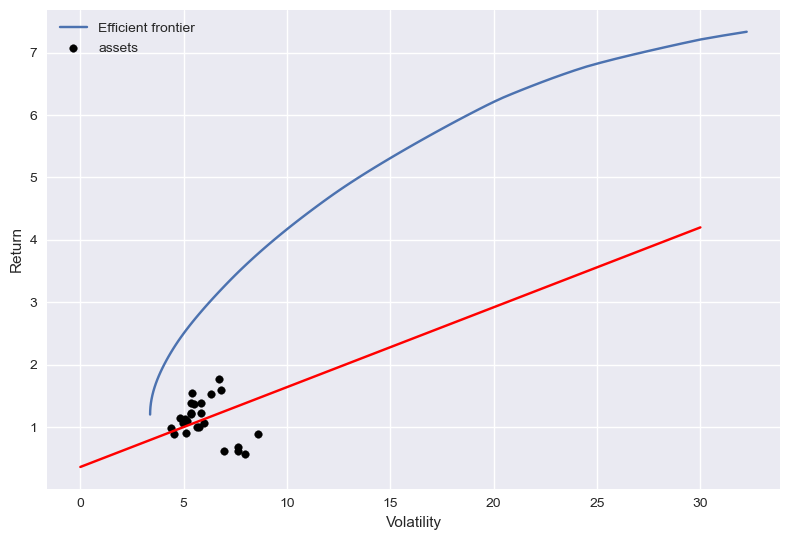

In [243]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import plotting
ef = EfficientFrontier(np.mean(np.array(train_data).T, axis=1), np.cov(np.array(train_data).T), weight_bounds=(None, None))
fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=True)
x = np.linspace(0, 30, 500)
plt.plot(x, [np.mean(risk_free)+np.mean(market_prem)/np.std(market_prem)*i for i in x], linestyle='-', color='red', label='CML')
plt.show()

We could observe that efficient frontier formed by 25 portfolios is above CML which shows that pricing errors do exist.

(g)

In [244]:
test_data = portfolio[0]

In [245]:
test_mu, test_var = np.mean(np.array(test_data).T, axis=1), np.cov(np.array(test_data).T)
pricing_errors = test_mu - stats["beta"] * np.mean(market_prem)
pricing_errors

0    -0.302455
1     0.470597
2     0.715940
3     0.855145
4     1.004128
5    -0.272151
6     0.408070
7     0.607035
8     0.753240
9     0.852567
10   -0.136930
11    0.350477
12    0.508239
13    0.540285
14    0.820824
15   -0.170232
16    0.367524
17    0.471880
18    0.578528
19    0.737580
20   -0.089418
21    0.323880
22    0.297395
23    0.428621
24    0.584179
Name: beta, dtype: float64

In [246]:
errors = []
for col in list(test_data.columns):
    Y = np.array(test_data[col]-risk_free)
    X = np.array(market_prem)
    error = Y - (stats.loc[stats["portfolio"]==col, "alpha"].iloc[0] + stats.loc[stats["portfolio"]==col, "beta"].iloc[0] * X)
    errors.append(list(error))

cov_matrix = np.cov(errors)
market_sr = np.mean(market_prem)/np.std(market_prem)
GRS = np.dot(np.dot(np.array(stats["alpha"]).reshape((1,25)), np.linalg.inv(cov_matrix)), np.array(stats["alpha"]).reshape((25, 1)))/(1+market_sr**2)*len(train_data)
print("GRS:", GRS[0,0])
df = 25
print("Chi-squared test: p-val=", 1-chi2.cdf(GRS[0,0], 25, loc=0, scale=1))

GRS: 129.02543537041757
Chi-squared test: p-val= 5.551115123125783e-16


We could see that the pricing errors are big for which CAPM cannot hold in this case.